## Red Wine Quality Prediction

### Data Descrription

#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

### Features 

Based on physicochemical tests:
1. fixed acidity
2. volatile acidity
3. citric acid
4.  residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol    

### Target

Our Target variable (based on sensory data) is 'quality' (score between 0 and 10)

#### Set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [1]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',None)

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [40]:
df.shape

(1599, 12)

There are 12 columns and 1599 rows in the dataset

### Checking Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:>

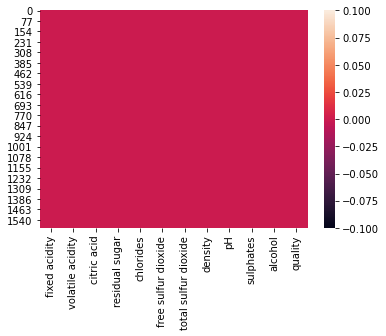

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.isnull().sum())
sns.heatmap(df.isnull())

There is no null values in the dataset

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Checking the dataypes of the columns

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the columns except the quality(target) column is float type.

### Visualization of Data

#### Distribution plot

(array([146, 823, 406, 166,  50,   8], dtype=int64),
 array([ 4.6       ,  6.48333333,  8.36666667, 10.25      , 12.13333333,
        14.01666667, 15.9       ]))

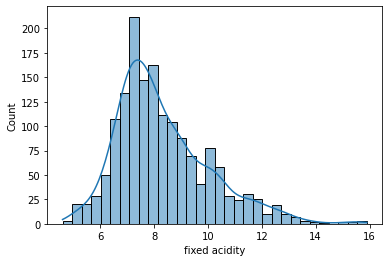

In [8]:
import numpy as np

sns.histplot(df['fixed acidity'],kde = True)
np.histogram(df['fixed acidity'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 6.3 -8.5

(array([310, 788, 426,  67,   7,   1], dtype=int64),
 array([0.12      , 0.36333333, 0.60666667, 0.85      , 1.09333333,
        1.33666667, 1.58      ]))

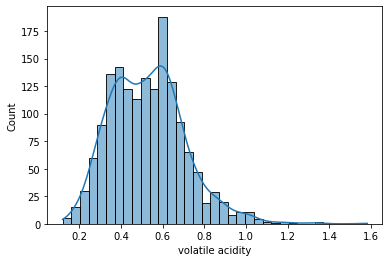

In [9]:
sns.histplot(df['volatile acidity'],kde = True)
np.histogram(df['volatile acidity'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.25 - 0.8.

(array([547, 462, 380, 175,  34,   1], dtype=int64),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        ]))

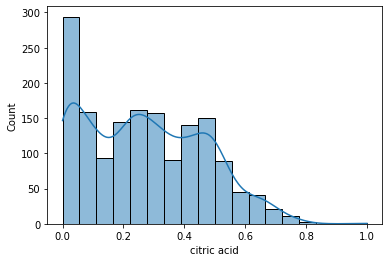

In [10]:
sns.histplot(df['citric acid'],kde = True)
np.histogram(df['citric acid'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0 - 0.5.

(array([1417,  123,   40,    8,    4,    7], dtype=int64),
 array([ 0.9       ,  3.33333333,  5.76666667,  8.2       , 10.63333333,
        13.06666667, 15.5       ]))

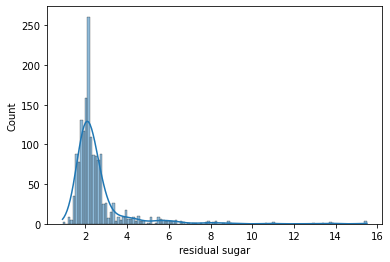

In [11]:
sns.histplot(df['residual sugar'],kde = True)
np.histogram(df['residual sugar'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.5 - 3.5.

(array([1456,  104,   17,   11,    9,    2], dtype=int64),
 array([0.012     , 0.11183333, 0.21166667, 0.3115    , 0.41133333,
        0.51116667, 0.611     ]))

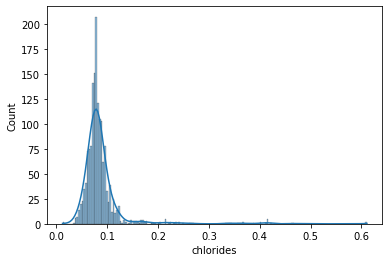

In [12]:
sns.histplot(df['chlorides'],kde = True)
np.histogram(df['chlorides'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.10 - 0.15.

(array([739, 550, 244,  48,  14,   4], dtype=int64),
 array([ 1.        , 12.83333333, 24.66666667, 36.5       , 48.33333333,
        60.16666667, 72.        ]))

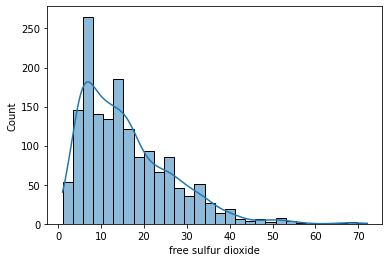

In [13]:
sns.histplot(df['free sulfur dioxide'],kde = True)
np.histogram(df['free sulfur dioxide'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.5 - 25.

(array([1093,  379,  115,   10,    0,    2], dtype=int64),
 array([  6.        ,  53.16666667, 100.33333333, 147.5       ,
        194.66666667, 241.83333333, 289.        ]))

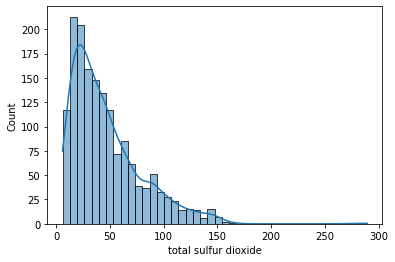

In [14]:
sns.histplot(df['total sulfur dioxide'],kde = True)
np.histogram(df['total sulfur dioxide'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 5 - 102.

(array([ 21, 150, 689, 580, 141,  18], dtype=int64),
 array([0.99007, 0.99234, 0.99461, 0.99688, 0.99915, 1.00142, 1.00369]))

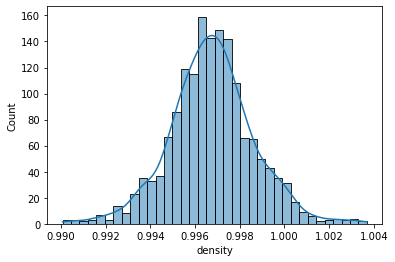

In [15]:
sns.histplot(df['density'],kde = True)
np.histogram(df['density'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.994 - 0.999

(array([ 22, 245, 812, 457,  58,   5], dtype=int64),
 array([2.74      , 2.95166667, 3.16333333, 3.375     , 3.58666667,
        3.79833333, 4.01      ]))

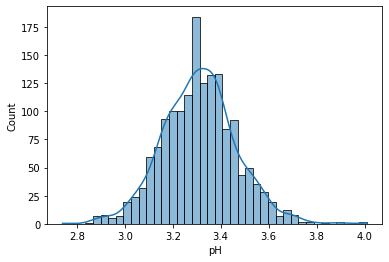

In [16]:
sns.histplot(df['pH'],kde = True)
np.histogram(df['pH'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 3 - 3.5.

(array([723, 759,  90,  19,   4,   4], dtype=int64),
 array([0.33      , 0.60833333, 0.88666667, 1.165     , 1.44333333,
        1.72166667, 2.        ]))

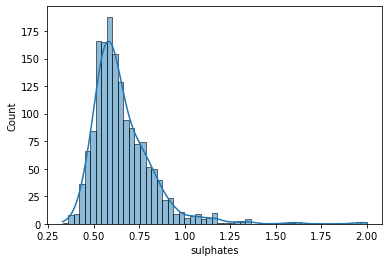

In [17]:
sns.histplot(df['sulphates'],kde = True)
np.histogram(df['sulphates'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 0.40 - 0.90.

(array([297, 688, 379, 180,  47,   8], dtype=int64),
 array([ 8.4       ,  9.48333333, 10.56666667, 11.65      , 12.73333333,
        13.81666667, 14.9       ]))

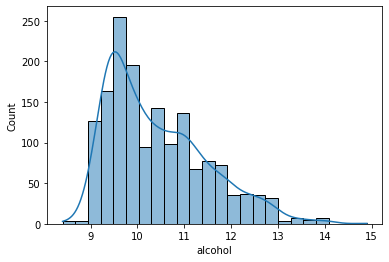

In [18]:
sns.histplot(df['alcohol'],kde = True)
np.histogram(df['alcohol'], bins = 6)

From the above observation, the data is not normalized and skewness is present. Most values lies between the range 9 - 12.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


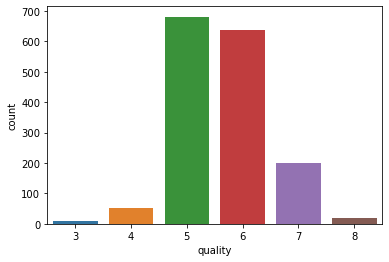

In [19]:
sns.countplot(df['quality'])
print(df['quality'].value_counts())

From the above observations, the number of type of wine that are rated as 5,6,7 are higher in the dataset. Least number of type of wines that are rated as 4,8 and 3.

### Statistical Summary

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

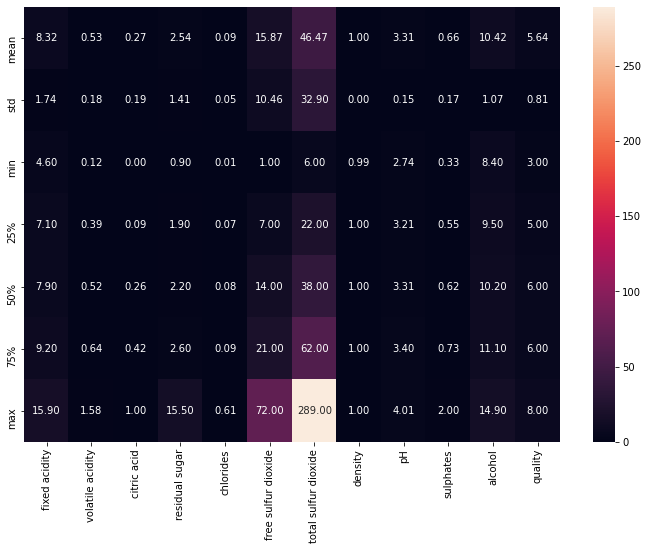

In [21]:
plt.figure(figsize = [12,8])
sns.heatmap(df.describe()[1:], annot = True, fmt = '0.2f')

There are huge difference between the 75th percentile and maximum value for the columns ['residual sugar'.'chlorides', 'free sulfur dioxide','total slfur dioxide']. That means there can be possible outliers in these columns

### Checking the Correlation

In [22]:
Correlation = df.corr()
Correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

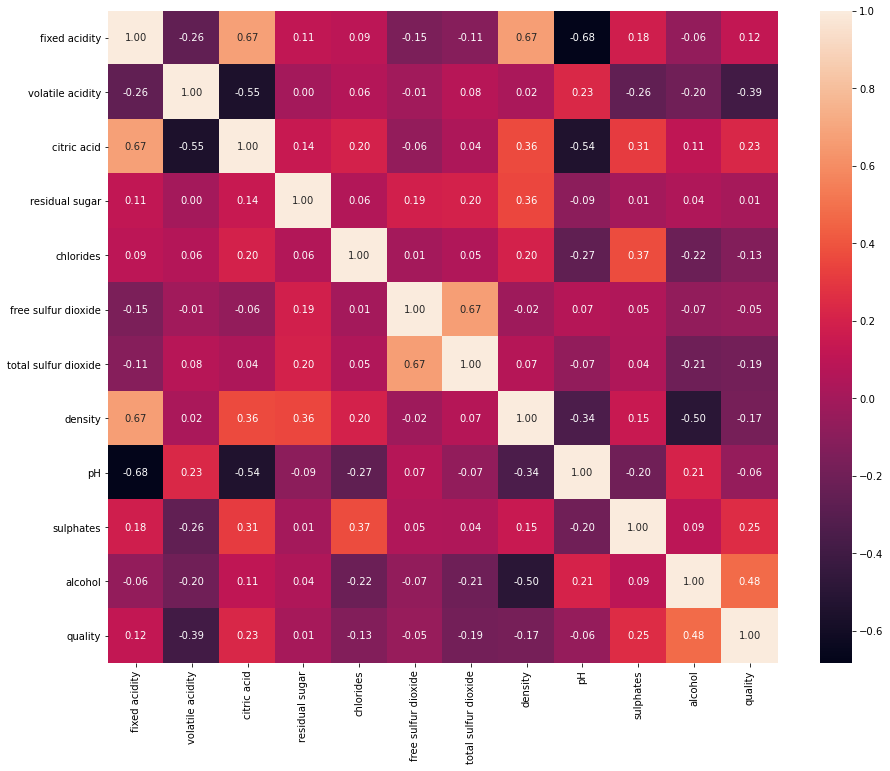

In [23]:

plt.figure(figsize= [15,12])
sns.heatmap(Correlation,annot = True, fmt = '0.2f')

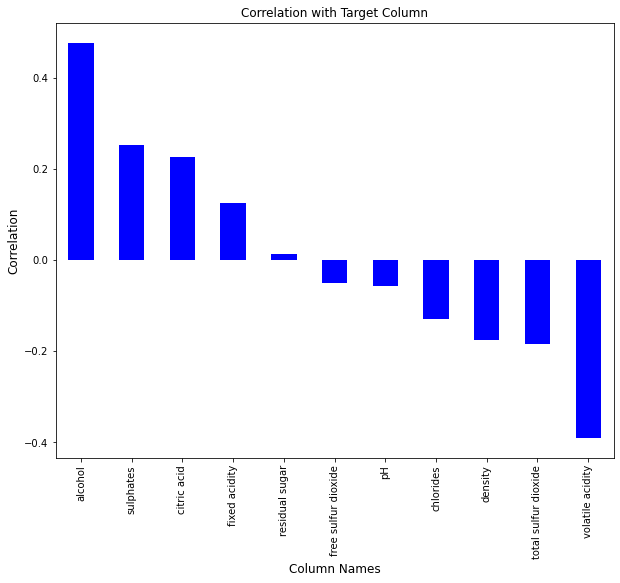

In [24]:
plt.figure(figsize = [10,8])
Correlation['quality'].sort_values(ascending= False).drop('quality').plot(kind = 'bar', color ='b')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

The columns ['alcohol','sulphates','citric acid','fixed acidity' 'residual sugar'] are positively correlated to the quality of the wine. The columns ['free sulfur dioxide', 'pH','chlorides','density','total slfur dioxide','volatile acidity'] are negatively correlating to the quality of the wine.

### Checking the data distribution among all the columns(Skewness)

In [25]:
Skewness = df.skew()
Skewness

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

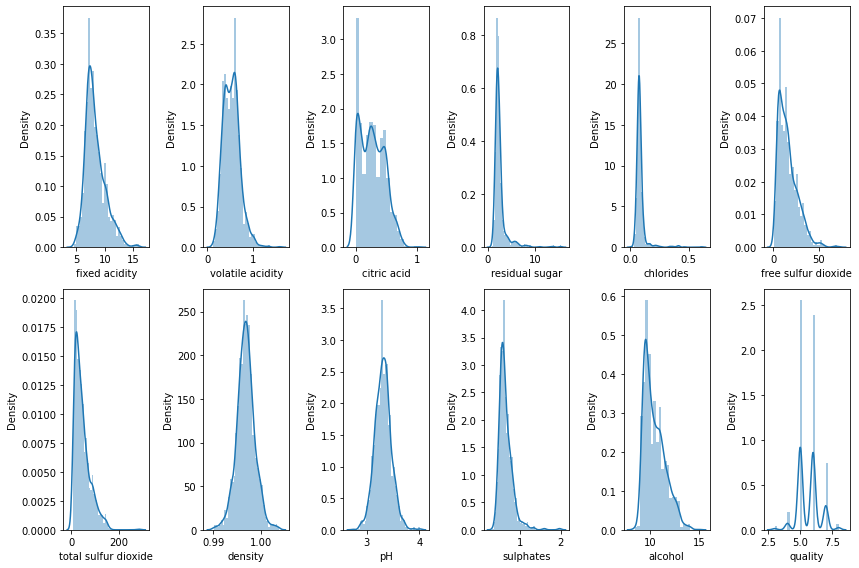

In [26]:
plt.figure(figsize = [12,8])
for i in range(0,len(df.columns.values)):
    plt.subplot(2,6,i+1)
    sns.distplot(df[df.columns.values[i]])
    plt.tight_layout()

We are setting the standard range of skewness as +/-1.

In [27]:
Skewness[np.abs(Skewness)>1]

residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
sulphates               2.428672
dtype: float64

The columns ['fixed acidity','volatile acidity','citric acid', 'density', 'pH','alcohol','quality'] are within the skewness standard. But the columns['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates'] are having high skewness.

### Checking Outliers

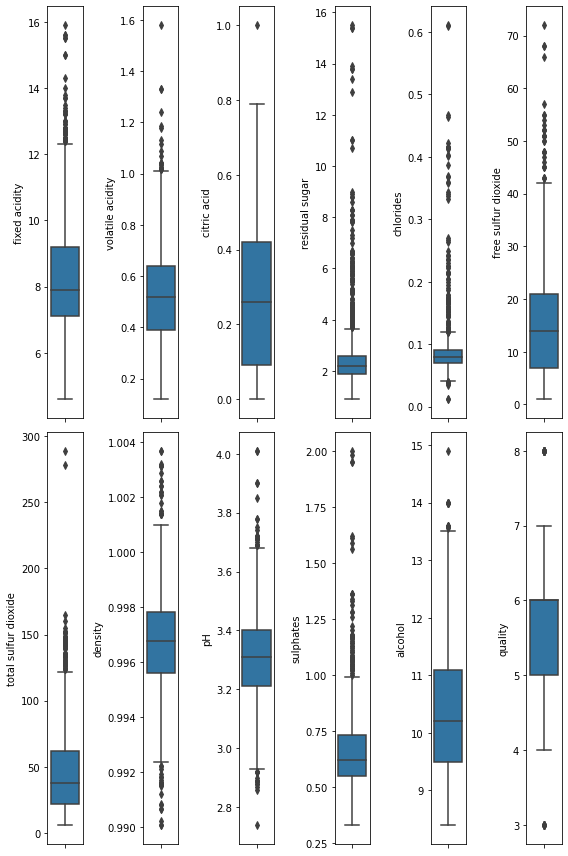

In [28]:
plt.figure(figsize = [8,12])
for i in range(0,len(df.columns.values)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y = df[df.columns.values[i]])
    plt.tight_layout()

From the above observations all the columns are having outliers. Extreme outliers are present in columns ['residual sugar','chlorides'].

### Data Cleaning

#### Dropping the columns which are having extreme outliers, less correlation with target variable and highly skewed distribution.

In [29]:
delete = pd.DataFrame([['residual sugar',0.013732,4.540655,'No','Alot'],['chlorides',-0.128907,5.680347,'No','Alot'],['free sulfur dioxide',-0.050656,1.250567,'No','Alot']],columns=['Column Name','Correlation with Target', 'Skewness','Normalized','Outliers'])
delete

,Column Name,Correlation with Target,Skewness,Normalized,Outliers
0,residual sugar,0.013732,4.540655,No,Alot
1,chlorides,-0.128907,5.680347,No,Alot
2,free sulfur dioxide,-0.050656,1.250567,No,Alot


In [41]:
df_new = df.drop(['residual sugar','chlorides','free sulfur dioxide'],axis = 1)
df_new

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,102.0,0.99780,3.35,0.80,10.500000,5


In [50]:
df_new.shape

(1599, 9)

### Setting Arbitrary Cutoff for Wine Quality(Target)

In [51]:
df_new['quality'] = df_new['quality'].replace([3,4,5,6],0).replace([7,8],1)
df_new.head(10)

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,102.0,0.9978,3.35,0.80,10.5,0


We have replaced the values in column quality as 1 if it is equal/greater than 7 and 0 if it is less than 7.

### Removing Outliers

In [52]:
from scipy.stats import zscore
z = np.abs(zscore(df_new))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.39625599],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.39625599],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.39625599],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.39625599],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.39625599],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.39625599]])

In [57]:
threshold = 3
df1 = df_new[(z<3).all(axis=1)]
df1.sample(10)

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1040,7.4,0.965,0.00,32.0,0.99756,3.58,0.67,10.2,0
1331,7.8,0.870,0.26,67.0,0.99668,3.26,0.46,9.2,0
1485,7.0,0.655,0.16,25.0,0.99606,3.37,0.55,9.7,0
935,8.8,0.300,0.38,72.0,0.99543,3.39,0.72,11.8,0
748,7.2,0.500,0.18,31.0,0.99761,3.52,0.72,9.6,0
423,10.5,0.240,0.47,24.0,0.99780,3.15,0.90,11.0,1
1525,6.7,0.480,0.08,34.0,0.99552,3.33,0.64,9.7,0
185,8.9,0.310,0.57,85.0,0.99710,3.26,0.53,9.7,0
368,10.3,0.340,0.52,75.0,0.99980,3.18,0.64,9.4,0
1246,7.4,0.740,0.07,48.0,0.99502,3.12,0.48,10.0,0


#### Loss Percent

In [54]:
loss_percent = (1599-1510)/1599*100
loss_percent

5.565978736710444

We are lossing only 5.57 percent of the dataset after removing the outliers which seems reasonable and the data is not much getting biased. So we can proceed with the next step.

### Checking whether the data is balanced or not

In [81]:
x = df1.iloc[:,:-1]
y= df1.iloc[:,-1]

In [82]:
print(x.shape)
print(y.shape)

(1510, 8)
(1510,)


0    1305
1     205
Name: quality, dtype: int64


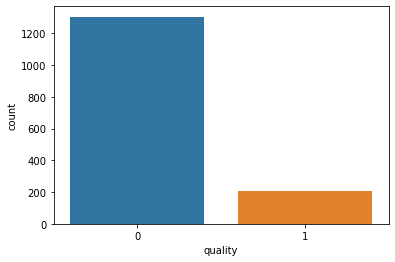

In [83]:
sns.countplot(y)
print(y.value_counts())

We can see that there is imbalance in the data where the data of bad quality wine is more in the dataset. We can handle the imbalance of this dataset.

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      1
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      1
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


0    1305
1    1305
Name: quality, dtype: int64


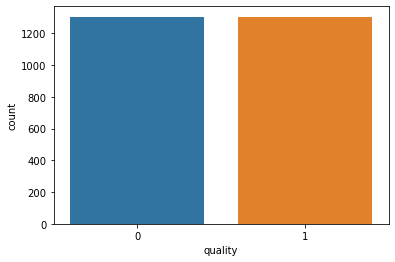

In [85]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

In [86]:
print(xtrainw.shape)
print(ytrainw.shape)

(2610, 8)
(2610,)


Now we have balanced the data distribution for each output.

### Removing the Skewness

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(xtrainw)

In [112]:
x = pd.DataFrame(x1,columns = xtrainw.columns)
y = ytrainw
print(x.shape)
print(y.shape)

(2610, 8)
(2610,)


### Checking the Multicolinearity of variables in the dataframe

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [115]:
calc_vif(x)

,Column Name,VIF Factor
0,fixed acidity,6.857327
1,volatile acidity,2.043094
2,citric acid,3.606316
3,total sulfur dioxide,1.179099
4,density,4.570841
5,pH,3.132755
6,sulphates,1.363321
7,alcohol,2.737603


The VIF factor for each columns are not having much difference compared to other columns in the DataFrame. That means there is no multicolinearity in the dataframe.

In [120]:
#Steps Peformed till now
#1. Loaded Data
#2. Checked for null values
#3. Datatypes of each columns.
#4. Data Visualization - using distribution plot and count plot.
#Statistical Summary  
#5. Describe of columns.
#6.Correlation of columns and correlation with target column.
#7. #Checked distribution of data for each column
#8. Skewness of data.
#9. Identifying the outliers.
#Data Cleaning
#10. Dropping the columns which has less impact on target variable.
#11. Setting Arbitrary cut off for target column as per requirement.
#12. Outliers removed.
#13. Handled the imbalance of data.
#14.Skewness removed
#15. Checking for multicolinearity of variables.

#### EDA Completed

### Training Process Begins

### Splitting the data into features and target

In [119]:
features = x.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(2610, 8)
(2610,)


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


LogisticRegression

##### Finding the best random_state

In [129]:
maxAcc = 0
maxRs = 0
lr = LogisticRegression()
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    lr.fit(features_train, target_train) #training the model
    pred_lr = lr.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_lr) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  7 the model is having accuracy score of  0.8563218390804598


In [181]:
lr = LogisticRegression()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 7)
lr.fit(features_train,target_train)
pred_lr = lr.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_lr))
print(confusion_matrix(target_test,pred_lr))
print(classification_report(target_test,pred_lr))

Accuracy Score is  0.8563218390804598
[[224  35]
 [ 40 223]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       259
           1       0.86      0.85      0.86       263

    accuracy                           0.86       522
   macro avg       0.86      0.86      0.86       522
weighted avg       0.86      0.86      0.86       522



KNeighborsClassifier

##### Finding the best random_state

In [133]:
maxAcc = 0
maxRs = 0
knn = KNeighborsClassifier()
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    knn.fit(features_train, target_train) #training the model
    pred_knn = knn.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_knn) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  80 the model is having accuracy score of  0.921455938697318


In [183]:
knn = KNeighborsClassifier()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 80)
knn.fit(features_train,target_train)
pred_knn = knn.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_knn))
print(confusion_matrix(target_test,pred_knn))
print(classification_report(target_test,pred_knn))

Accuracy Score is  0.921455938697318
[[210  37]
 [  4 271]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       247
           1       0.88      0.99      0.93       275

    accuracy                           0.92       522
   macro avg       0.93      0.92      0.92       522
weighted avg       0.93      0.92      0.92       522



SVC

In [319]:
#User defined function for using different kernels for SVC model
def svca(ker):
    svc = SVC(kernel = ker,probability=True)
    svc.fit(features_train,target_train)
    pred_svc = svc.predict(features_test)
    print(accuracy_score(target_test,pred_svc))
    print(confusion_matrix(target_test,pred_svc))
    print(classification_report(target_test,pred_svc))

SVC('rbf')

##### Finding the best random_state

In [321]:
maxAcc = 0
maxRs = 0
svc = SVC(kernel = 'rbf',probability=True)
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    svc.fit(features_train, target_train) #training the model
    pred_svc = svc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_svc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  26 the model is having accuracy score of  0.9042145593869731


In [327]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = 26)
svca('rbf')

0.9042145593869731
[[239  30]
 [ 20 233]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       269
           1       0.89      0.92      0.90       253

    accuracy                           0.90       522
   macro avg       0.90      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522



SVC('linear')

##### Finding the best random_state

In [323]:
maxAcc = 0
maxRs = 0
svc = SVC(kernel = 'linear',probability=True)
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    svc.fit(features_train, target_train) #training the model
    pred_svc = svc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_svc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  7 the model is having accuracy score of  0.8601532567049809


In [324]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = 7)
svca('linear')

0.8601532567049809
[[218  41]
 [ 32 231]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       259
           1       0.85      0.88      0.86       263

    accuracy                           0.86       522
   macro avg       0.86      0.86      0.86       522
weighted avg       0.86      0.86      0.86       522



SVC('poly')

##### Finding the best random_state

In [325]:
maxAcc = 0
maxRs = 0
svc = SVC(kernel = 'poly',probability=True)
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    svc.fit(features_train, target_train) #training the model
    pred_svc = svc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_svc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  99 the model is having accuracy score of  0.8773946360153256


In [326]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = 99)
svca('poly')

0.8773946360153256
[[227  35]
 [ 29 231]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       262
           1       0.87      0.89      0.88       260

    accuracy                           0.88       522
   macro avg       0.88      0.88      0.88       522
weighted avg       0.88      0.88      0.88       522



DecisionTreeClassifier

##### Finding the best random_state

In [331]:
maxAcc = 0
maxRs = 0
dtc = DecisionTreeClassifier()
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    dtc.fit(features_train, target_train) #training the model
    pred_dtc = dtc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_dtc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  54 the model is having accuracy score of  0.9291187739463601


In [332]:
dtc = DecisionTreeClassifier()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 54)
dtc.fit(features_train,target_train)
pred_dtc = dtc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_dtc))
print(confusion_matrix(target_test,pred_dtc))
print(classification_report(target_test,pred_dtc))

Accuracy Score is  0.921455938697318
[[240  20]
 [ 21 241]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       260
           1       0.92      0.92      0.92       262

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.92       522
weighted avg       0.92      0.92      0.92       522



GaussianNB

##### Finding the best random_state

In [163]:
maxAcc = 0
maxRs = 0
gnb = GaussianNB()
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    gnb.fit(features_train, target_train) #training the model
    pred_gnb = gnb.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_gnb) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  7 the model is having accuracy score of  0.8390804597701149


In [222]:
gnb = GaussianNB()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 7)
gnb.fit(features_train,target_train)
pred_gnb = gnb.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_gnb))
print(confusion_matrix(target_test,pred_gnb))
print(classification_report(target_test,pred_gnb))

Accuracy Score is  0.8390804597701149
[[221  38]
 [ 46 217]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       259
           1       0.85      0.83      0.84       263

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.84      0.84      0.84       522



RandomForestClassifier

##### Finding the best random_state

In [261]:
maxAcc = 0
maxRs = 0
rfc = RandomForestClassifier(n_estimators=100)
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    rfc.fit(features_train, target_train) #training the model
    pred_rfc = rfc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_rfc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  26 the model is having accuracy score of  0.9616858237547893


In [279]:
rfc = RandomForestClassifier(n_estimators=100)
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 26)
rfc.fit(features_train,target_train)
pred_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_rfc))
print(confusion_matrix(target_test,pred_rfc))
print(classification_report(target_test,pred_rfc))

Accuracy Score is  0.9636015325670498
[[256  13]
 [  6 247]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       269
           1       0.95      0.98      0.96       253

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.96      0.96      0.96       522



AdaBoostClassifier

##### Finding the best random_state

In [169]:
maxAcc = 0
maxRs = 0
abc = AdaBoostClassifier()  ##AdaBoostClassifer(base_estimator = DecisionTreeClassifer(), n_estimators = 50, learning_rate = 1.0) --Default
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    abc.fit(features_train, target_train) #training the model
    pred_abc = abc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_abc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  23 the model is having accuracy score of  0.9042145593869731


In [229]:
abc = AdaBoostClassifier()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 23)
abc.fit(features_train,target_train)
pred_abc = abc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_abc))
print(confusion_matrix(target_test,pred_abc))
print(classification_report(target_test,pred_abc))

Accuracy Score is  0.9042145593869731
[[217  30]
 [ 20 255]]
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       247
           1       0.89      0.93      0.91       275

    accuracy                           0.90       522
   macro avg       0.91      0.90      0.90       522
weighted avg       0.90      0.90      0.90       522



GradientBoostingClassifier

##### Finding the best random_state

In [172]:
maxAcc = 0
maxRs = 0
gbc = GradientBoostingClassifier()
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    gbc.fit(features_train, target_train) #training the model
    pred_gbc = gbc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_gbc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  26 the model is having accuracy score of  0.9291187739463601


In [231]:
gbc = GradientBoostingClassifier()
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 26)
gbc.fit(features_train,target_train)
pred_gbc = gbc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_gbc))
print(confusion_matrix(target_test,pred_gbc))
print(classification_report(target_test,pred_gbc))

Accuracy Score is  0.9291187739463601
[[248  21]
 [ 16 237]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       269
           1       0.92      0.94      0.93       253

    accuracy                           0.93       522
   macro avg       0.93      0.93      0.93       522
weighted avg       0.93      0.93      0.93       522



VotingClassifier

##### Finding the best random_state

In [175]:
maxAcc = 0
maxRs = 0
estimator = [('LR', LogisticRegression()),
             ('KNN',KNeighborsClassifier()),
             ('SVC', SVC(gamma='auto', probability=True)),
             ('DTC',DecisionTreeClassifier()),
             ('GNB',GaussianNB()),
             ('RFC',RandomForestClassifier(n_estimators=100))]

vtc = VotingClassifier(estimators=estimator,voting='hard')
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.20,random_state = i)
    vtc.fit(features_train, target_train) #training the model
    pred_vtc = vtc.predict(features_test) #testing the model
    acc = accuracy_score(target_test,pred_vtc) #Finding the accuracy
    if acc>maxAcc:
        maxAcc = acc
        maxRs = i
print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

At random state  26 the model is having accuracy score of  0.9176245210727969


In [233]:
vtc = VotingClassifier(estimators=estimator,voting='hard')
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 26)
vtc.fit(features_train,target_train)
pred_vtc = vtc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_vtc))
print(confusion_matrix(target_test,pred_vtc))
print(classification_report(target_test,pred_vtc))

Accuracy Score is  0.9195402298850575
[[247  22]
 [ 20 233]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       269
           1       0.91      0.92      0.92       253

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.92       522
weighted avg       0.92      0.92      0.92       522



From all the models, RandomForestClassifer is giving the best accuracy score of 95.6%(acc.score=0.9559386973180076).

### Cross Validation

LogisticRegression

In [182]:
from sklearn.model_selection import cross_val_score
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(lr,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_lr))

At cv fold 9  the cv score is  0.8126436781609195 and the accuracy score  is  0.8563218390804598


KNeighborsClassifier

In [184]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(knn,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_knn))

At cv fold 8  the cv score is  0.8677827339074313 and the accuracy score  is  0.921455938697318


SVC

In [218]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(svc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_svc))

At cv fold 9  the cv score is  0.8636015325670497 and the accuracy score  is  0.4846743295019157


DecisionTreeClassifier

In [333]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(dtc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_dtc))

At cv fold 8  the cv score is  0.8896420798859308 and the accuracy score  is  0.921455938697318


GaussianNB

In [223]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(gnb,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_gnb))

At cv fold 8  the cv score is  0.7972974240633384 and the accuracy score  is  0.8390804597701149


RandomForestClassifier

In [280]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(rfc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_rfc))

At cv fold 9  the cv score is  0.9176245210727969 and the accuracy score  is  0.9636015325670498


AdaBoostClassifier

In [230]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(abc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_abc))

At cv fold 8  the cv score is  0.8501716665728598 and the accuracy score  is  0.9042145593869731


GradientBoostingClassifier

In [232]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(gbc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_gbc))

At cv fold 7  the cv score is  0.8812221247575396 and the accuracy score  is  0.9291187739463601


VotingClassifier

In [234]:
cv_mean = 0
cv_fold = 0
for j in range(2,10):
    cv_score = cross_val_score(vtc,features, target, cv = j)
    a =cv_score.mean()
    if a>cv_mean:
        cv_mean = a
        cv_fold = j
print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(target_test,pred_vtc))

At cv fold 9  the cv score is  0.8735632183908046 and the accuracy score  is  0.9195402298850575


### From the cross validation of all the models, Random Forest Classifier is performing well with cv score of 91.7% with an accuracy socre of 95.4%

### Hyperparameter Tuning

In [267]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[100,125,150],
             'criterion':['gini','entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             'random_state':[26]}

grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=parameters, cv = 9)

In [268]:
grid.fit(features,target)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 125, 150],
                         'random_state': [26]})

In [269]:
grid.best_score_

0.9191570881226053

In [270]:
grid.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 150,
 'random_state': 26}

In [271]:
rfc = RandomForestClassifier(n_estimators=150,criterion='gini',max_features='auto',random_state = 26)
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = 26)
rfc.fit(features_train,target_train)
pred_rfc = rfc.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_rfc))
print(confusion_matrix(target_test,pred_rfc))
print(classification_report(target_test,pred_rfc))

Accuracy Score is  0.9578544061302682
[[254  15]
 [  7 246]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       269
           1       0.94      0.97      0.96       253

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.96      0.96      0.96       522



In [272]:
cv_score = cross_val_score(rfc,features, target, cv = 8)
cv_score_mean = cv_score.mean()
print("CV score is ",cv_score_mean,"and accuracy score is ",accuracy_score(target_test,pred_rfc))

CV score is  0.9133928068891766 and accuracy score is  0.9578544061302682


The model without hyper parameter tuning is slightly better and giving the best cross validation score and accuracy score.

### AUC ROC Curve

In [281]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [299]:
#User defined function for plotting AUC ROC curve for different models

def auc_roc(model):
    target_pred_prob = model.predict_proba(features_test)[:,1]
    fpr,tpr,thresholds = roc_curve(target_test,target_pred_prob)
    auc_score = roc_auc_score(target_test, model.predict(features_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

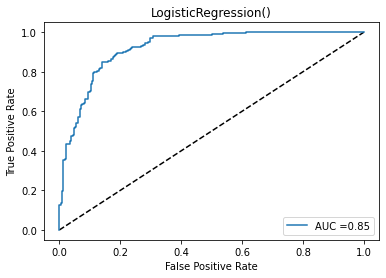

In [300]:
auc_roc(lr)

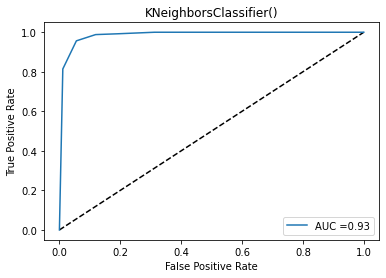

In [301]:
auc_roc(knn)

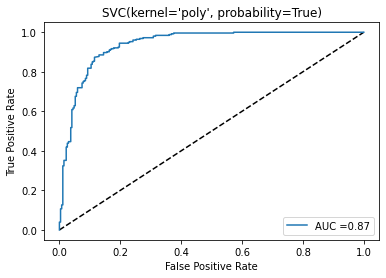

In [328]:
auc_roc(svc)

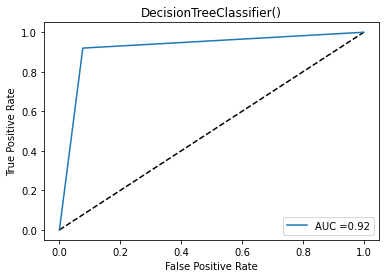

In [334]:
auc_roc(dtc)

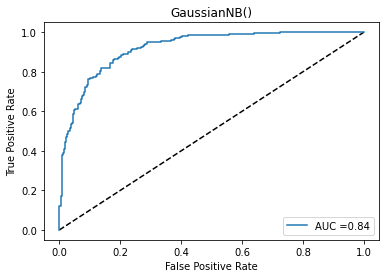

In [308]:
auc_roc(gnb)

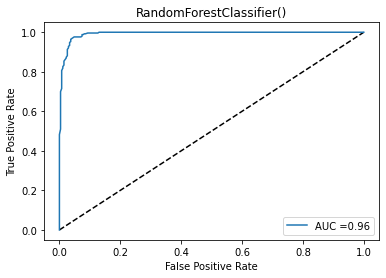

In [309]:
auc_roc(rfc)

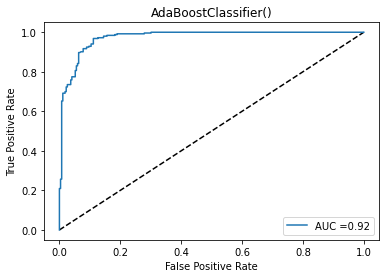

In [310]:
auc_roc(abc)

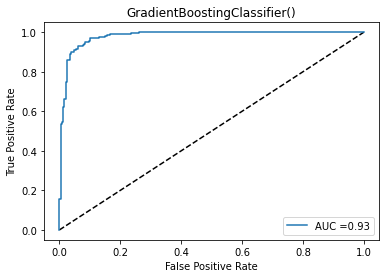

In [311]:
auc_roc(gbc)

The area under the Random Forest Classifier is higher compared to other models with the AUC ROC curve is covering 96% of the area.

### The Random Forest Classifer model is performing well compared to all other models in several tests with 96% accuracy of prediction.

### Saving the Best Model

In [338]:
import pickle

filename = 'wine_quality_prediction_model.pkl'
pickle.dump(rfc,open(filename,'wb'))

### Conclusion

In [347]:
a = np.array(target_test)
predicted = np.array(rfc.predict(features_test))
df_prediction = pd.DataFrame({'Original':a,'Predicted':predicted})
df_prediction

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
517,1,1
518,0,0
519,0,0
520,1,1


The model has predicted all the values accurately. That means it is performing well with predictions.

Now the model can predict the quality of the wine with the following physiochemical properties.

1. fixed acidity
2. volatile acidity
3. citric acid
4. total sulfur dioxide
5. density
6. pH
7. sulphates
8. alcohol
